<a href="https://colab.research.google.com/github/muhammed-bayat/mneTest/blob/main/edfView.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mne

     |████████████████████████████████| 6.8MB 4.0MB/s 


In [4]:
#from google.colab import drive google drive dataset kullanmak için

In [5]:
# drive.mount('/gdrive') colab gdrive konumu baglandı

Mounted at /gdrive


In [2]:
import mne

In [8]:
import matplotlib as plt

In [28]:
# cd /gdrive/MyDrive/Colab\ Notebooks/sinyaller/beyza.edf gdrive dataset konumu 

[Errno 20] Not a directory: '/gdrive/MyDrive/Colab Notebooks/sinyaller/beyza.edf'
/gdrive/MyDrive/Colab Notebooks/sinyaller


In [4]:
cd datasets/

c:\Users\clayos\Documents\GitHub\mneTest\datasets


In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 24D0-D19E

 Directory of c:\Users\clayos\Documents\GitHub\mneTest\datasets

12/13/2020  01:40 PM    <DIR>          .
12/13/2020  01:40 PM    <DIR>          ..
12/13/2020  01:40 PM            95,232 beyza.edf
12/13/2020  01:40 PM             1,336 beyza.json
               2 File(s)         96,568 bytes
               2 Dir(s)  164,468,473,856 bytes free


In [24]:
fname="beyza.edf"

In [37]:
raw=mne.io.read_raw_edf(fname)

Extracting EDF parameters from c:\Users\clayos\Documents\GitHub\mneTest\datasets\beyza.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [85]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_dtype',
 '_dtype_',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_segment',
 '_read_segment_file',
 '_reconstruct_proj',
 '_set_channel_positi

In [8]:
raw=mne.io.read_raw_edf(fname,preload=True)

Extracting EDF parameters from c:\Users\clayos\Documents\GitHub\mneTest\datasets\beyza.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3263  =      0.000 ...   101.969 secs...


In [9]:
raw.filter? 

Signature:
raw.filter(
    l_freq,
    h_freq,
    picks=None,
    filter_length='auto',
    l_trans_bandwidth='auto',
    h_trans_bandwidth='auto',
    n_jobs=1,
    method='fir',
    iir_params=None,
    phase='zero',
    fir_window='hamming',
    fir_design='firwin',
    skip_by_annotation=('edge', 'bad_acq_skip'),
    pad='reflect_limited',
    verbose=None,
)
Docstring:
Filter a subset of channels.

Parameters
----------

l_freq : float | None
    For FIR filters, the lower pass-band edge; for IIR filters, the lower
    cutoff frequency. If None the data are only low-passed.

h_freq : float | None
    For FIR filters, the upper pass-band edge; for IIR filters, the upper
    cutoff frequency. If None the data are only high-passed.
picks : str | list | slice | None
    Channels to include. Slices and lists of integers will be
    interpreted as channel indices. In lists, channel *type* strings
    (e.g., ``['meg', 'eeg']``) will pick channels of those
    types, channel *name* strin

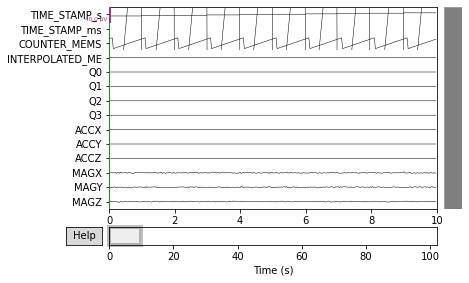

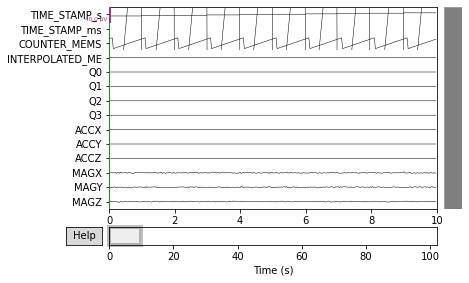

In [38]:
raw.plot() #matplot ile grafik çizildi.

In [39]:
fname="beyzaedf.edf" #2 edf dosyası olduğu için her ikisinin grafiğini görmek istersek
raw=mne.io.read_raw_edf(fname)
raw=mne.io.read_raw_edf(fname,preload=True)

Extracting EDF parameters from c:\Users\clayos\Documents\GitHub\mneTest\datasets\beyzaedf.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\clayos\Documents\GitHub\mneTest\datasets\beyzaedf.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13055  =      0.000 ...   101.992 secs...


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.019 - 2.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.02
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 2.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.10 Hz)
- Filter length: 21775 samples (170.117 sec)



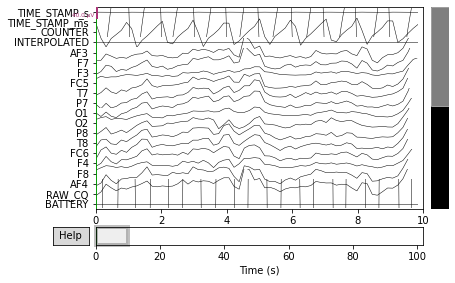

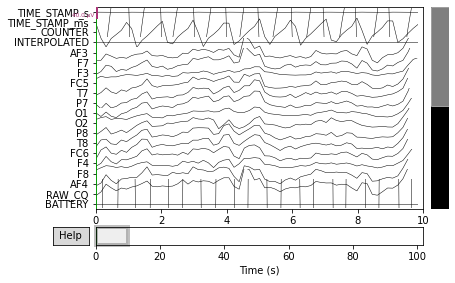

In [40]:
raw.filter(0.0194,2.10) #istenen edf filitreleme setting up band-pass filter from 1 - 3 Hz
raw.plot() # flitreledikten sonra grafiği çiz

In [35]:
ica=mne.preprocessing.ICA(n_components=20, random_state=0)